In [1]:
import pandas as pd
import pandas_ta as pta
import numpy as np
import os, sys
import datetime as dt

data_dir = os.path.abspath('./store')




ohlc = pd.read_csv(os.path.join(data_dir, 'SPX_1d_ohlcv.csv'))
ohlc['datetime'] = ohlc.datetime.apply(lambda d: pd.to_datetime(d, unit='ms'))
ohlc['date'] = ohlc['datetime'].dt.date
ohlc.set_index('datetime', inplace=True)


MyStrategy = pta.Strategy(
    name="supertrend",
    ta=[
        {"kind": "hma", "length": 21},
        {"kind": "supertrend", "length":21, "high":"HMA_21", "low":"HMA_21","close":"HMA_21", "multiplier":1.6},
        {"kind": "hma", "length": 14},
        {"kind": "supertrend", "length":14, "high":"HMA_21", "low":"HMA_21","close":"HMA_21", "multiplier":1.6},
        {"kind": "rsi", "length":14, },
        {"kind": "rsi", "length":21, },
    ]
)

# (2) Run the Strategy
ohlc.ta.strategy(MyStrategy)
ohlc



,Unnamed: 0,open,high,low,close,volume,date,HMA_21,SUPERT_21_1.6,SUPERTd_21_1.6,SUPERTl_21_1.6,SUPERTs_21_1.6,HMA_14,SUPERT_14_1.6,SUPERTd_14_1.6,SUPERTl_14_1.6,SUPERTs_14_1.6,RSI_14,RSI_21
datetime,,,,,,,,,,,,,,,,,,,
1970-12-31 06:00:00,0,92.27,92.79,91.36,92.15,0,1970-12-31,NaN,0.000000,1,NaN,NaN,NaN,0.000000,1,NaN,NaN,NaN,NaN
1971-01-04 06:00:00,1,92.15,92.19,90.64,91.15,0,1971-01-04,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1971-01-05 06:00:00,2,91.15,92.28,90.69,91.80,0,1971-01-05,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1971-01-06 06:00:00,3,91.80,93.00,91.50,92.35,0,1971-01-06,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1971-01-07 06:00:00,4,92.35,93.26,91.75,92.38,0,1971-01-07,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-28 05:00:00,13301,4269.65,4317.27,4264.38,4299.70,0,2023-09-28,4288.090371,4311.886290,-1,NaN,4311.886290,4260.665595,4314.413826,-1,NaN,4314.413826,35.160534,39.031974
2023-09-29 05:00:00,13302,4328.18,4333.15,4274.86,4288.05,0,2023-09-29,4268.201213,4292.379358,-1,NaN,4292.379358,4253.260952,4294.917469,-1,NaN,4294.917469,34.024157,38.187196
2023-10-02 05:00:00,13303,4284.52,4300.58,4260.21,4288.39,0,2023-10-02,4254.641295,4278.701237,-1,NaN,4278.701237,4253.945786,4280.998952,-1,NaN,4280.998952,34.091107,38.228164


In [636]:


def trend_ratio(ohlc, length=10):

    p1_diffs = (ohlc[['high','low']].subtract(ohlc.close, axis=0))

    # ohlc[f'trend_score_p1_max']  = pd.Series(
    #     p1_diffs.values[np.arange(p1_diffs.shape[0]), p1_diffs.columns.get_indexer(p1_diffs.abs().idxmax(axis=1))],
    #     index=p1_diffs.index,
    #     name='p1_max_range'
    # )

    ohlc[f'trend_score_p1_max'] = p1_diffs.abs().max(axis=1) * p1_diffs.sum(axis=1).apply(np.sign)

    ohlc[f'trend_score_range_{length}'] = (ohlc.high.rolling(length).max() - ohlc.low.rolling(length).min()).rename('prange')

    ohlc[f'trend_score_ud_ratio_{length}'] = ohlc[f'trend_score_p1_max'].rolling(length).apply(lambda x: x[x > 0].sum() / x.abs().sum())

    ohlc[f'trend_score_range_{length}_norm'] = ohlc[f'trend_score_range_{length}'].divide(ohlc.close, axis=0)

    ohlc[f'trend_score_ud_ratio_{length}_norm'] = ohlc[f'trend_score_ud_ratio_{length}'].divide(ohlc.close, axis=0)

    ohlc[f'trend_score_ratio_{length}'] = (ohlc[f'trend_score_p1_max'].rolling(length).sum() / ohlc[f'trend_score_range_{length}'])

    return ohlc

def get_downtrend_target(ohlc, down_per_day=.005):
    targets = pd.DataFrame(index=ohlc.index)
    for p in [3, 5, 10]:
        targets[f'f{p}_min'] = (ohlc.low.shift(-p).rolling(p).min() / ohlc.close) - 1
        targets[f'f{p}_downtrend'] = (targets[f'f{p}_min'] < (-down_per_day * p))
    targets['downtrend'] = (targets.filter(regex='f\d_downtrend').sum(axis=1) > 0)
    targets.loc[targets.filter(regex='min').isnull().all(axis=1), 'downtrend'] = np.nan
    return targets


In [637]:
ohlc = trend_ratio(ohlc)
targets = get_downtrend_target(ohlc, down_per_day=.005)

/tmp/ipykernel_69613/1585634914.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.



<Axes: xlabel='datetime'>

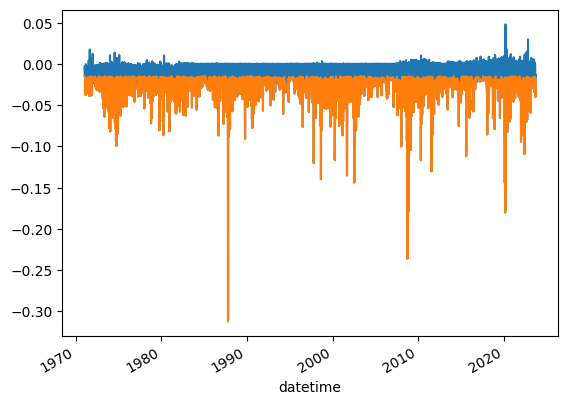

In [612]:
targets['f5_min'].plot()
targets['f5_min'].loc[targets['downtrend']].plot()

In [630]:
from plotly import graph_objects as go
i = 100



data = [
            go.Ohlc(x=ohlc.index[-i:],
                    open=ohlc.open.iloc[-i:],
                    high=ohlc.high.iloc[-i:],
                    low=ohlc.low.iloc[-i:],
                    close=ohlc.close.iloc[-i:],
                ),
                # go.Line(x=ohlc.index[-i:],
                #         y=ohlc.close.iloc[-i:],
                #         name='close'
                # ),
                go.Scatter(
                        x=ohlc.iloc[-i:].loc[targets['downtrend'].iloc[-i:]].index,
                        y=ohlc.iloc[-i:].loc[targets['downtrend'].iloc[-i:]].close,
                        name='trends',
                        mode="markers"
                ),
]

fig = go.Figure(data=data)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [631]:
y.iloc[-100:]

datetime
2023-05-12 05:00:00    False
2023-05-15 05:00:00    False
2023-05-16 05:00:00    False
2023-05-17 05:00:00    False
2023-05-18 05:00:00    False
                       ...  
2023-09-28 05:00:00     True
2023-09-29 05:00:00     True
2023-10-02 05:00:00    False
2023-10-03 05:00:00    False
2023-10-04 04:00:00    False
Name: downtrend, Length: 100, dtype: bool

<Axes: xlabel='datetime'>

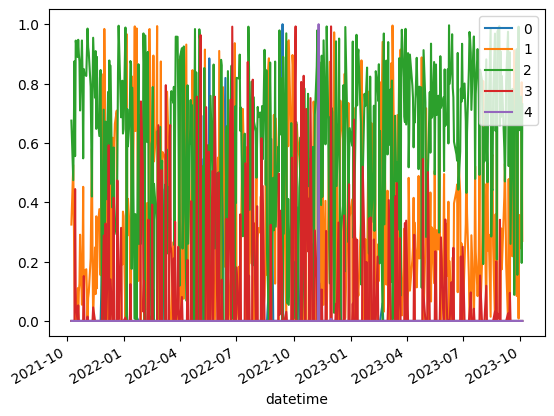

In [71]:
from sklearn.preprocessing import SplineTransformer

spltx = SplineTransformer(n_knots=5, degree=1).fit(ohlc[['close']].pct_change().iloc[-500:])

pd.DataFrame(spltx.transform(ohlc[['close']].pct_change().iloc[-500:]),index=ohlc[['close']].iloc[-500:].index).plot()

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin
from typing import List

from itertools import product
import numpy as np
import pandas as pd

def unroll_period(daily_df, p, cols):
    
    def get_col_dict():
        col_dict = {}
        for i in np.arange(p):
            col_dict[i] = [f'{x[0]}_{x[1]}' for x in product(cols, [i])]
        return col_dict
    
    col_dict = get_col_dict()

    def flatten(df, idx):
        cols = []
        for i in np.arange(df.shape[0])+1:
            cols.extend(col_dict[i])
        try:
            return pd.Series(df.flatten(), index=cols, name=idx)
        except Exception as e:
            print(e)
            print(df.values.flatten().shape, cols)
            return pd.Series(df.flatten(), name=idx)

    df = daily_df[cols].sort_index(ascending=False)
    flat_df = []
    for i in np.arange(0, df.shape[0]-p, 1):
        try:
            flat_df.append(
                flatten(df.values[i+1:i+p], idx=df.index[i])
            )
        except:
            print(i+p, i)
    flat_index = flat_df[0].index
    for i in np.arange(df.shape[0]-p, df.shape[0], 1):
        flat_df.append(
                pd.Series(index=flat_index, name=df.index[i], dtype=float).fillna(0)
            )
    flat_df = pd.concat(flat_df, axis=1).T.sort_index()

    return flat_df

class Unroller(BaseEstimator, TransformerMixin):

    def __init__(
        self, 
        p: int=10,
        cols: List[str]=None
    ):
        self.p = p
        self.cols = cols

    def fit(self, X, y=None, **kwargs):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        if self.cols is None:
            self.cols = X.columns.tolist()
        return self
    
    def transform(self, X, y=None, **kwargs):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        Xtx = unroll_period(X, self.p, self.cols).fillna(0).values
        if y is not None:
            if not isinstance(y, pd.Series):
                y = pd.Series(y)
            ytx = y.loc[Xtx.index].values
            return Xtx, ytx
        return Xtx
        

In [120]:
from itertools import product
from collections import OrderedDict

class MultiSpline(BaseEstimator, TransformerMixin):

    def __init__(
        self, 
        ks: List[int]=[5,10,13,20],
        degrees: List[int]=[1,2,3]
    ):
        self.ks = ks
        self.degrees = degrees

    def fit(self, X, y=None, **kwargs):
        self.models = OrderedDict()
        for (k, d) in product(self.ks, self.degrees):
            self.models[(k,d)] = SplineTransformer(n_knots=k, degree=d).fit(X)
        return self
    
    def transform(self, X, y=None, **kwargs):
        return np.concatenate([
            model.transform(X)
            for model in self.models.values()
        ], axis=1)

In [214]:
ohlc.filter(regex='trend_score')

,trend_score_5,trend_score_10,trend_score_20,trend_score_p1_max,trend_score_range_5,trend_score_range_10,trend_score_range_20
datetime,,,,,,,
1970-12-31 06:00:00,NaN,NaN,NaN,-0.79,NaN,NaN,NaN
1971-01-04 06:00:00,NaN,NaN,NaN,1.04,NaN,NaN,NaN
1971-01-05 06:00:00,NaN,NaN,NaN,-1.11,NaN,NaN,NaN
1971-01-06 06:00:00,NaN,NaN,NaN,-0.85,NaN,NaN,NaN
1971-01-07 06:00:00,-0.316794,NaN,NaN,0.88,2.62,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-28 05:00:00,-0.245180,0.418585,0.534135,-35.32,118.77,259.35,302.62
2023-09-29 05:00:00,-0.213857,0.465463,0.601877,45.10,99.88,227.73,302.62
2023-10-02 05:00:00,-0.156581,0.292221,0.466081,-28.18,94.52,222.40,275.66


In [617]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import SplineTransformer, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

trend_ratio(ohlc, 5)
trend_ratio(ohlc, 10)
trend_ratio(ohlc, 20)

X, y = pd.concat([
    ohlc.close.pct_change().rename('diff'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(2).rename('yshift'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(3).rename('yshift1'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(4).rename('yshift2'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(5).rename('yshift3'),
    ohlc.filter(regex='trend_score')

], axis=1).iloc[-505:-5], (ohlc.close.shift(-5) / ohlc.close).iloc[-505:-5]
assert X.index.symmetric_difference(y.index).shape[0] == 0

pipeline = Pipeline([
    ('basis_expansion', SplineTransformer(n_knots=20, degree=1)),
    # ('basis_expansion', MultiSpline()),
    ('unroller', Unroller(p=10)),
    ('linear_regression', RandomForestRegressor(n_estimators=100)),
    # ('linear_regression', Ridge(fit_intercept=False)),
    # ('ada', AdaBoostRegressor())
])

pipeline.fit(X.iloc[:-100], y.iloc[:-100])

pd.Series(pipeline.predict(X.iloc[-100:]), index=X.index[-100:]).iloc[10:].plot()
y.iloc[-90:].plot()
mean_absolute_percentage_error(y.iloc[-90:],pipeline.predict(X.iloc[-100:])[10:])


KeyboardInterrupt: 

In [664]:
trend_ratio(ohlc, 5)
trend_ratio(ohlc, 10)
trend_ratio(ohlc, 20)

X, y = pd.concat([
    ohlc.close.pct_change().rename('diff'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(2).rename('yshift'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(3).rename('yshift1'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(4).rename('yshift2'),
    # (ohlc.close.shift(-2) / ohlc.close).shift(5).rename('yshift3'),
    ohlc.filter(regex='trend_score')

], axis=1).iloc[-2000:], (targets.downtrend.iloc[-2000:].dropna() > 0)
idx = X.index.intersection(y.index)
X = X.loc[idx]
y = y.loc[idx]
assert X.index.symmetric_difference(y.index).shape[0] == 0

In [670]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import SplineTransformer, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, classification_report
from lightgbm import LGBMClassifier


clf = StackingClassifier(
    estimators=[
    ('lgbm', LGBMClassifier(n_estimators=100, max_depth=3, verbose=-1)),
    ('rfc', RandomForestClassifier(n_estimators=100, max_depth=3)),
    ],
    final_estimator=LogisticRegression(fit_intercept=False),
    cv=5,
    stack_method='predict_proba',
    passthrough=True,
)

pipeline = Pipeline([
    ('basis_expansion', SplineTransformer(n_knots=20, degree=1)),
    # ('basis_expansion', MultiSpline()),
    ('unroller', Unroller(p=10)),
    # ('linear_regression', LGBMClassifier(n_estimators=100, max_depth=3, verbose=-1)),
    # ('linear_regression', LogisticRegression(fit_intercept=False)),
    # ('ada', AdaBoostRegressor())
    ('stack', clf)
])
i = 100

print(y.iloc[:-i].mean())
print(y.iloc[-i:].mean())

pipeline.fit(X.iloc[:-i], y.iloc[:-i])

down_preds = pd.Series(pipeline.predict(X.iloc[-i:]), index=X.index[-i:])

print(classification_report(
    y.loc[down_preds.index],
    down_preds,
))



0.3046916183447549
0.21
              precision    recall  f1-score   support

       False       0.76      0.73      0.75        79
        True       0.12      0.14      0.13        21

    accuracy                           0.61       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.63      0.61      0.62       100



/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [671]:
from plotly import graph_objects as go


data = [
            go.Ohlc(x=down_preds.index,
                    open=ohlc.open.loc[down_preds.index],
                    high=ohlc.high.loc[down_preds.index],
                    low=ohlc.low.loc[down_preds.index],
                    close=ohlc.close.loc[down_preds.index],
                ),
                # go.Line(x=ohlc.index[-i:],
                #         y=ohlc.close.iloc[-i:],
                #         name='close'
                # ),
                go.Scatter(
                        x=down_preds.loc[down_preds].index,
                        y=ohlc.loc[down_preds.index].loc[down_preds].close,
                        name='trends',
                        mode="markers"
                ),
]

fig = go.Figure(data=data)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [621]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, classification_report

print(classification_report(
    pd.Series(pipeline.predict(X.iloc[-100:]), index=X.index[-100:]).iloc[10:],
    y.iloc[-90:]
))


              precision    recall  f1-score   support

       False       0.72      0.80      0.76        64
        True       0.32      0.23      0.27        26

    accuracy                           0.63        90
   macro avg       0.52      0.51      0.51        90
weighted avg       0.60      0.63      0.61        90



In [619]:
pd.Series(pipeline.predict(X.iloc[-100:]), index=X.index[-100:])

datetime
2023-05-05 05:00:00    False
2023-05-08 05:00:00    False
2023-05-09 05:00:00    False
2023-05-10 05:00:00    False
2023-05-11 05:00:00    False
                       ...  
2023-09-21 05:00:00    False
2023-09-22 05:00:00     True
2023-09-25 05:00:00     True
2023-09-26 05:00:00    False
2023-09-27 05:00:00    False
Length: 100, dtype: bool

0.007542874460513466

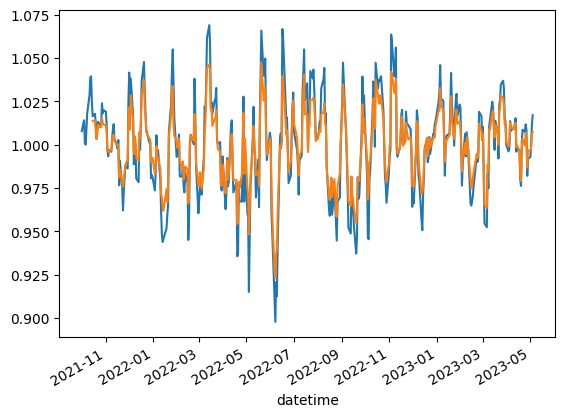

In [205]:
y.iloc[:-100].plot()

pd.Series(pipeline.predict(X.iloc[:-100]), index=X.index[:-100]).iloc[10:].plot()


mean_absolute_percentage_error(y.iloc[:-100],pipeline.predict(X.iloc[:-100]))

In [101]:
pipeline = Pipeline([
    ('basis_expansion', SplineTransformer(n_knots=5, degree=1)),
    ('unroller', Unroller(p=10)),
    # ('linear_regression', RandomForestRegressor(n_estimators=100)),
])

pipeline.fit_transform(X.iloc[:-100], y.iloc[:-100]).shape

(390, 45)

In [179]:
p1_diffs = (ohlc[['high','low']].subtract(ohlc.close, axis=0))

p1_max_diffs = pd.Series(
    p1_diffs.values[np.arange(p1_diffs.shape[0]), p1_diffs.columns.get_indexer(p1_diffs.abs().idxmax(axis=1))],
    index=p1_diffs.index,
    name='p1_max_range'
)

p_range = (ohlc.high.rolling(10).max() - ohlc.low.rolling(10).min()).rename('prange')

trend_score = (p1_max_diffs.rolling(10).sum() / p_range)


<Axes: xlabel='datetime'>

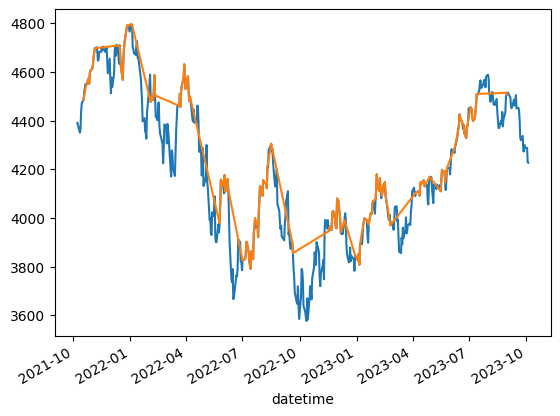

In [180]:
ohlc.close.iloc[-500:].plot()
ohlc.close.iloc[-500:].loc[trend_score.iloc[-500:] < -.5].plot()

In [573]:
from plotly import graph_objects as go
i = 1000


th_sig_sum = ohlc['trend_score_10'].iloc[i:].apply(lambda x: np.greater(x, .2)).rolling(10).sum() 
mask = ((th_sig_sum.shift(1) == 0) & (th_sig_sum > 0)).shift(1).fillna(False)
mask = (ohlc['trend_score_10'] > .2)
data = [
                go.Line(x=ohlc.index[-i:],
                        y=ohlc.close.iloc[-i:],
                        name='close'
                ),
                go.Scatter(
                        x=ohlc.iloc[-i:].loc[mask].index,
                        y=ohlc.iloc[-i:].loc[mask].close,
                        name='trends',
                        mode="markers"
                ),
]

fig = go.Figure(data=data)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [347]:
import pymc as pm
import numpy as np


class BayesianBacktestParameterizer:

    def __init__(
        self,
        eval_func: callable,
        n: int=1000,
        stop_loss_loc: float=0,
        stop_loss_sigma: float=.01,
        target_loc: float=.05,
        target_sigma: float=.05,
    ):
        self.eval_func = eval_func
        self.n = n
        self.stop_loss_loc = stop_loss_loc
        self.stop_loss_sigma = stop_loss_sigma
        self.target_loc = target_loc
        self.target_sigma = target_sigma

    @property
    def model(self):
        if not hasattr(self, '_model'):
            with pm.Model() as self._model:

                betas = pm.Normal(name='coef',  mu=0, sigma=3, shape=2)
                eps = pm.Normal(name='eps', mu=0, sigma=self.target_sigma)

                stop_loss_sd = pm.Normal(name='stop_loss_sd', mu=self.stop_loss_loc, sigma=self.stop_loss_sigma)
                stop_loss = pm.Deterministic('stop_loss', stop_loss_sd * -1)
                target_profit = pm.Normal(name='target_profit', mu=self.target_loc, sigma=self.target_sigma)

                self.samples = pm.sample_prior_predictive(samples=self.n)

                stop = self.samples.prior.stop_loss.to_numpy()[0]
                target = self.samples.prior.target_profit.to_numpy()[0]

                self.obs = np.array([self.eval_func(st, tp) for (st, tp) in zip(stop, target)])

                mu = betas[0] * stop + betas[1] * target + eps

                y = pm.Normal(name='estimated_outcome', mu=mu, sigma=2, observed=self.obs)

        return self._model
    
    def fit(self, n:int=1000):
        with self.model:
            self.trace = pm.sample(draws=n)
        return self
    



In [419]:
from joblib import delayed, Parallel
import bambi as bmb


class BayesianBacktestParameterizer:

    def __init__(
        self,
        eval_func: callable,
        n: int=10000,
        stop_loss_loc: float=0,
        stop_loss_sigma: float=.01,
        target_loc: float=.05,
        target_sigma: float=.05,
        timeframe: int=10,
        threshold_low: float=-.7,
        threshold_high: float=.5,
    ):
        self.eval_func = delayed(eval_func)
        self.n = n
        self.stop_loss_loc = stop_loss_loc
        self.stop_loss_sigma = stop_loss_sigma
        self.target_loc = target_loc
        self.target_sigma = target_sigma
        self.timeframe = timeframe
        self.threshold_low = threshold_low
        self.threshold_high = threshold_high

    @property
    def model(self):
        if not hasattr(self, '_model'):

            threshold = np.random.uniform(low=self.threshold_low, high=self.threshold_high, size=self.n)
            stop_loss = np.abs(np.random.normal(loc=self.stop_loss_loc, scale=self.stop_loss_sigma, size=self.n)) * -1
            target_profit = np.random.normal(loc=self.target_loc, scale=self.target_sigma, size=self.n)
            timeframe = np.random.poisson(lam=self.timeframe, size=self.n) + 1

            jobs = [self.eval_func(th, st, tp, tf) for (th, st, tp, tf) in zip(threshold, stop_loss, target_profit, timeframe)]

            obs = np.array(list(Parallel(n_jobs=8)(jobs)))
            self.data = pd.concat([
                    pd.Series(stop_loss, name='stop_loss'),
                    pd.Series(target_profit, name='target_profit'),
                    pd.Series(timeframe, name='timeframe'),
                    pd.Series(threshold, name='threshold'),
                    pd.Series(obs, name='pnl')
            ], axis=1)
            self._model = bmb.Model("pnl ~ threshold + stop_loss + target_profit + timeframe", self.data)
            self.trace = self._model.fit(draws=3000)

        return self._model
    
    def fit(self, n:int=1000):
        self.model
        return self

In [539]:
from functools import partial



def get_downtrend_eval_func(df, trend_col: str, p=10, rel_func=np.greater, timeframe=20, sharpe: bool=False):


    def eval_params(th, stop_loss, target_profit, timeframe, return_full=False):
        th_sig_sum = df[trend_col].apply(lambda x: rel_func(x, th)).rolling(p).sum() 
        signal = ((th_sig_sum.shift(1) == 0) & (th_sig_sum > 0)).shift(1).fillna(False)
        if not signal.any():
            return -1
        signal_ids = np.array(np.arange(signal.shape[0]))[signal.values]
        if isinstance(stop_loss, np.ndarray):
            st = stop_loss[0]
        else:
            st = stop_loss
        if isinstance(target_profit, np.ndarray):
            tp = target_profit[0]
        else:
            tp = target_profit
        pnls = []
        if return_full:
            actions = []
            lengths = []
        for i in signal_ids:
            open_price = df.open.iat[i]
            returns = (1 - df.low.iloc[i:i+timeframe].divide(open_price)).values
            
            closes = (returns >= tp)
            stops = (returns <= st)
            if any(stops):
                stop_out =np.argmax(stops)
            else:
                stop_out = stops.shape[0]
            if any(closes):
                cash_out = np.argmax(closes)
            else:
                cash_out = returns.shape[0]
            if return_full:
                if stop_out < cash_out:
                    actions.append('stop')
                    lengths.append(stop_out)
                else:
                    actions.append('close')
                    lengths.append(cash_out)
            if stop_out < cash_out:
                pnls.append(returns[stop_out])
            else:
                if cash_out == returns.shape[0]:
                    pnls.append(returns[-1])
                else:
                    pnls.append(tp)
        if return_full:
            return pd.concat([
                pd.Series(pnls, index=signal[signal].index, name='pnl'), 
                pd.Series(actions, index=signal[signal].index, name='action'), 
                pd.Series(lengths, index=signal[signal].index, name='length'), 
            ], axis=1)
        if sharpe:
            return np.mean(pnls) / np.std(pnls)
        return np.mean(pnls)

    return eval_params

<Axes: >

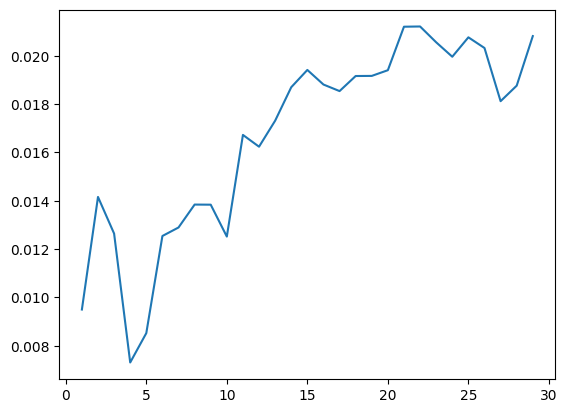

In [537]:
eval_func = get_downtrend_eval_func(ohlc.iloc[-500:], trend_col='trend_score_10', p=10, sharpe=False)
pnls = {}
for x in np.arange(1, 30, 1):
    pnls[x] = eval_func(.2, -.015, .04, x)

pd.Series(pnls).plot()

In [481]:
eval_func = get_downtrend_eval_func(ohlc.iloc[-500:], trend_col='trend_score_20', p=10, sharpe=False)

eval_func(.0175, -.015, .025, 30)

0.017244267994565552

In [482]:
eval_func(.0175, -.015, .025, 30, True)

datetime
2021-11-23 06:00:00    0.025324
2022-01-14 06:00:00    0.005011
2022-04-22 05:00:00    0.026953
2022-06-14 05:00:00    0.032881
2022-08-29 05:00:00    0.004253
2022-12-19 06:00:00    0.013947
2023-03-09 06:00:00    0.038098
2023-05-05 05:00:00    0.000000
2023-08-04 05:00:00    0.008731
dtype: float64

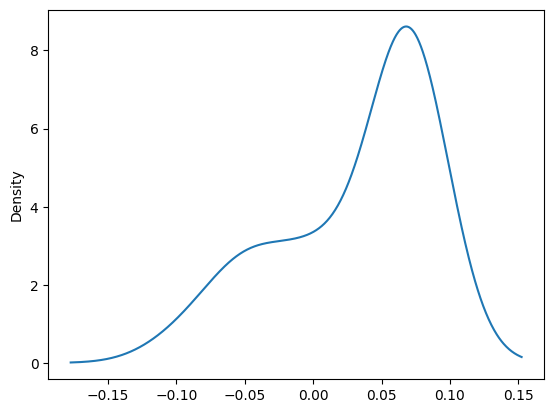

<Axes: xlabel='datetime'>

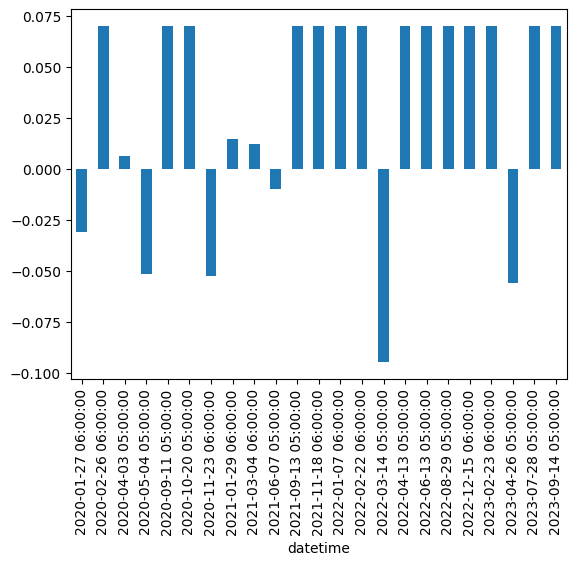

In [571]:
eval_func = get_downtrend_eval_func(ohlc.iloc[-1000:], trend_col='trend_score_10', p=10, sharpe=True)

downs = eval_func(.2, -.015, .04, 15, True)
downs1 = eval_func(.2, -.015, .02, 15, True)
downs2 = eval_func(.2, -.015, .01, 15, True)


(downs.pnl + downs1.pnl + downs2.pnl).plot(kind='kde')
plt.show()
(downs.pnl + downs1.pnl + downs2.pnl).plot(kind='bar')

In [583]:
(downs.pnl + downs1.pnl + downs2.pnl).mean()

0.03118179872890002

In [584]:
downs.pnl.mean()

0.016856896775069494

<Axes: ylabel='Frequency'>

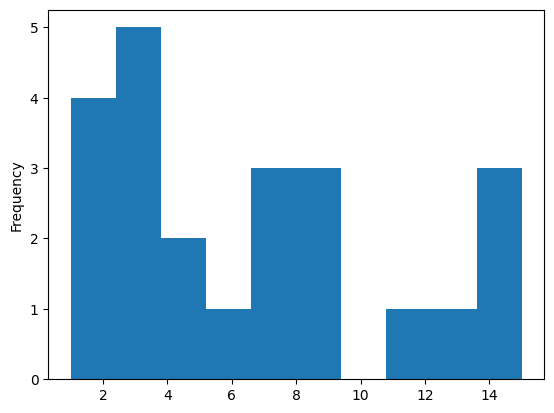

In [582]:
downs.length.plot(kind='hist')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '2020-01-27 06:00:00'),
  Text(1, 0, '2020-02-26 06:00:00'),
  Text(2, 0, '2020-04-03 05:00:00'),
  Text(3, 0, '2020-05-04 05:00:00'),
  Text(4, 0, '2020-09-11 05:00:00'),
  Text(5, 0, '2020-10-20 05:00:00'),
  Text(6, 0, '2020-11-23 06:00:00'),
  Text(7, 0, '2021-01-29 06:00:00'),
  Text(8, 0, '2021-03-04 06:00:00'),
  Text(9, 0, '2021-06-07 05:00:00'),
  Text(10, 0, '2021-09-13 05:00:00'),
  Text(11, 0, '2021-11-18 06:00:00'),
  Text(12, 0, '2022-01-07 06:00:00'),
  Text(13, 0, '2022-02-22 06:00:00'),
  Text(14, 0, '2022-03-14 05:00:00'),
  Text(15, 0, '2022-04-13 05:00:00'),
  Text(16, 0, '2022-06-13 05:00:00'),
  Text(17, 0, '2022-08-29 05:00:00'),
  Text(18, 0, '2022-12-15 06:00:00'),
  Text(19, 0, '2023-02-23 06:00:00'),
  Text(20, 0, '2023-04-26 05:00:00'),
  Text(21, 0, '2023-07-28 05:00:00'),
  Text(22, 0, '2023-09-14 05:00:00')])

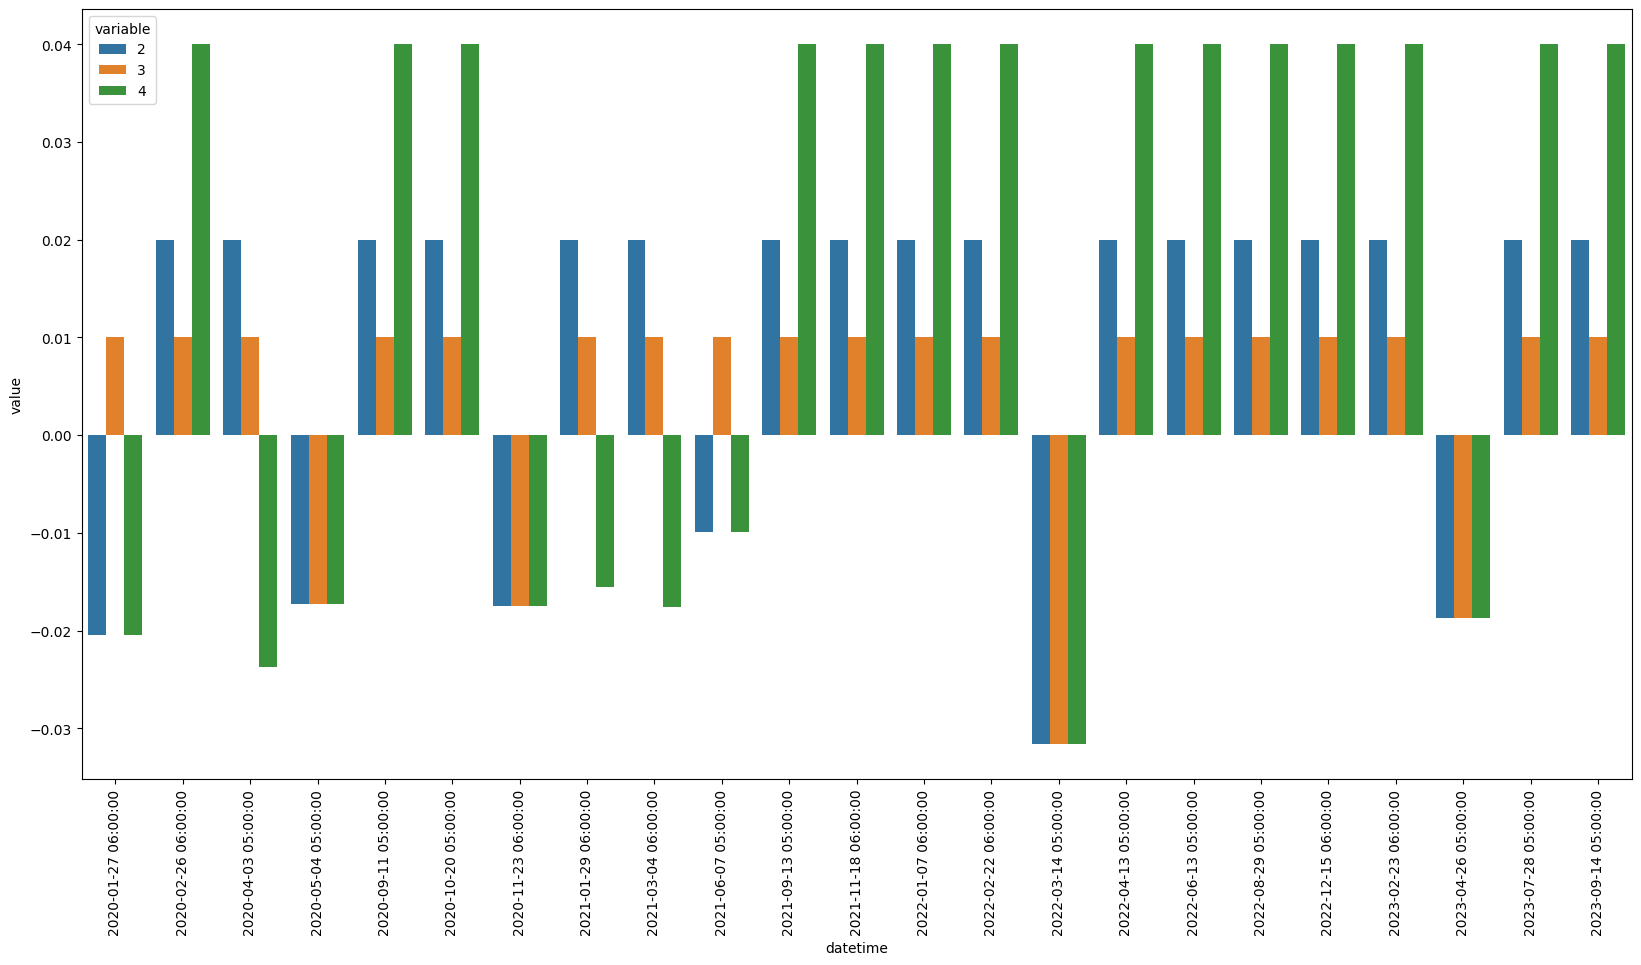

In [577]:
downs = eval_func(.2, -.015, .04, 15, True)
downs1 = eval_func(.2, -.015, .02, 15, True)
downs2 = eval_func(.2, -.015, .01, 15, True)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(
    data=pd.melt(pd.concat([downs.pnl.rename('4'),downs1.pnl.rename('2'), downs2.pnl.rename('3')], axis=1).reset_index(), value_vars=['2','3','4'], id_vars=['datetime']), 
    x='datetime',
    y='value',
    hue='variable'
)

plt.xticks(rotation=90)

<Axes: ylabel='Frequency'>

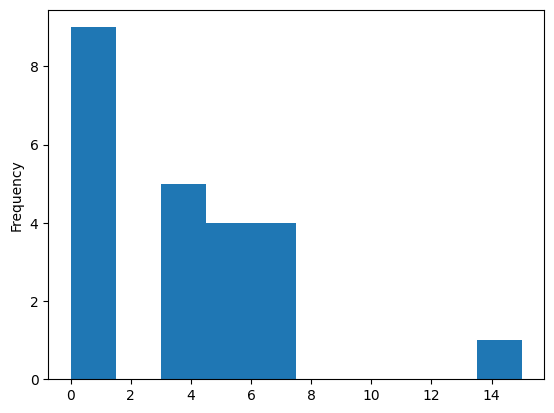

In [580]:
downs1.length.plot(kind='hist')

In [574]:
downs2.shape

(23, 3)

In [563]:
pd.melt(pd.concat([downs.pnl.rename('4'),downs1.pnl.rename('2'), downs2.pnl.rename('3')], axis=1).reset_index(), value_vars=['2','3','4'], id_vars=['datetime'])

,datetime,variable,value
0,2020-01-27 06:00:00,2,-0.020507
1,2020-02-26 06:00:00,2,0.020000
2,2020-04-03 05:00:00,2,0.020000
3,2020-05-04 05:00:00,2,-0.017243
4,2020-09-11 05:00:00,2,0.020000
...,...,...,...
64,2022-12-15 06:00:00,4,0.040000
65,2023-02-23 06:00:00,4,0.040000
66,2023-04-26 05:00:00,4,-0.018675
67,2023-07-28 05:00:00,4,0.040000


In [562]:
pd.concat([downs.pnl.rename('4'),downs1.pnl.rename('2'), downs2.pnl.rename('3')], axis=1)

,4,2,3
datetime,,,
2020-01-27 06:00:00,-0.020507,-0.020507,-0.020507
2020-02-26 06:00:00,0.040000,0.020000,0.030000
2020-04-03 05:00:00,-0.023718,0.020000,-0.023718
2020-05-04 05:00:00,-0.017243,-0.017243,-0.017243
2020-09-11 05:00:00,0.040000,0.020000,0.030000
2020-10-20 05:00:00,0.040000,0.020000,0.030000
2020-11-23 06:00:00,-0.017525,-0.017525,-0.017525
2021-01-29 06:00:00,-0.015513,0.020000,-0.015513
2021-03-04 06:00:00,-0.017598,0.020000,-0.017598


<Axes: xlabel='datetime'>

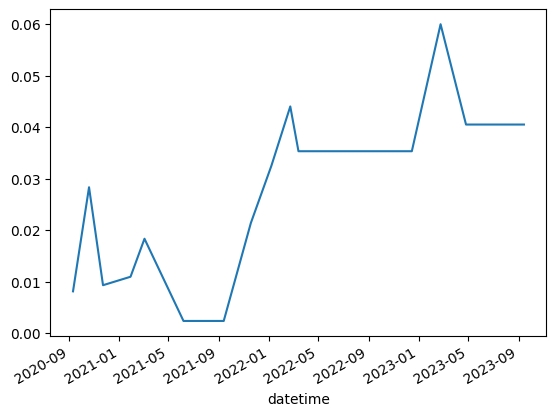

In [546]:
(downs.pnl + downs1.pnl).rolling(5).mean().plot()

<Axes: ylabel='Frequency'>

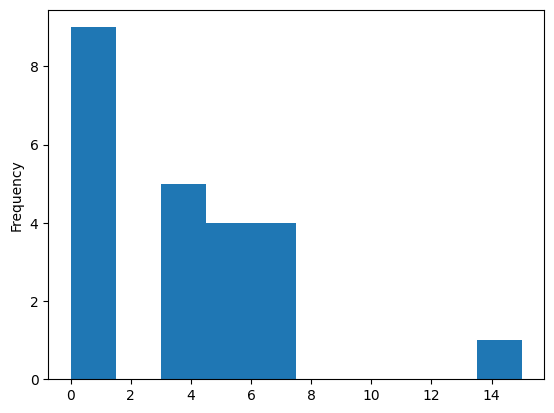

In [548]:
downs1.length.plot(kind='hist')

In [423]:
btk = BayesianBacktestParameterizer(eval_func=get_downtrend_eval_func(ohlc.iloc[-500:], trend_col='trend_score_10')).fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pnl_sigma, Intercept, threshold, stop_loss, target_profit, timeframe]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 10 seconds.


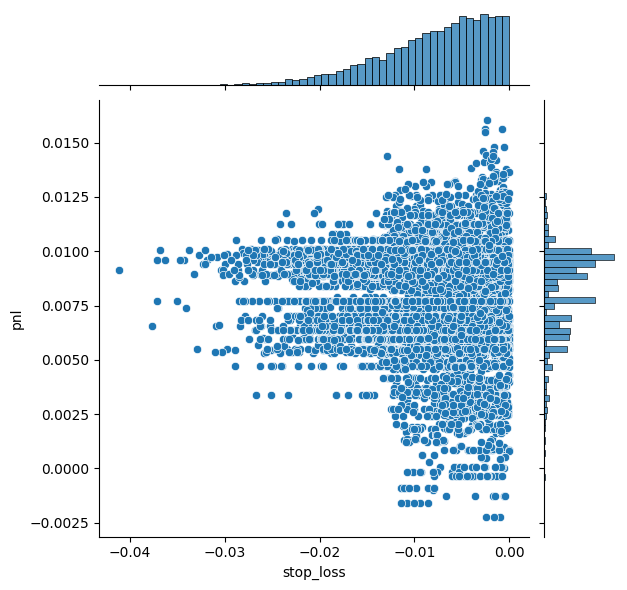

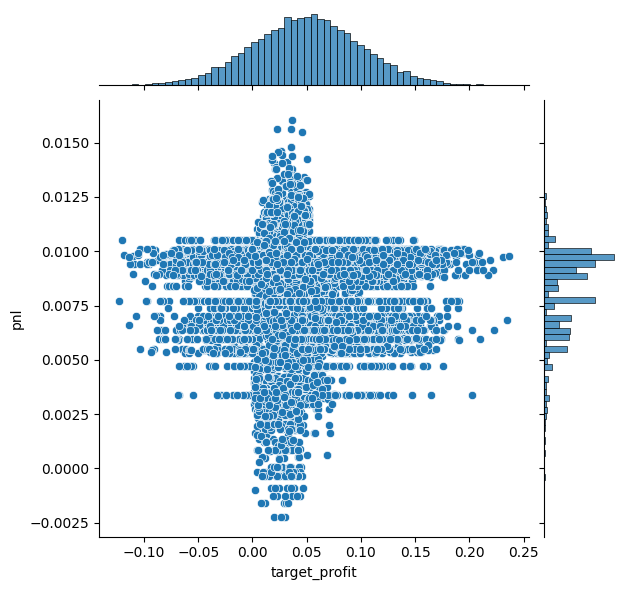

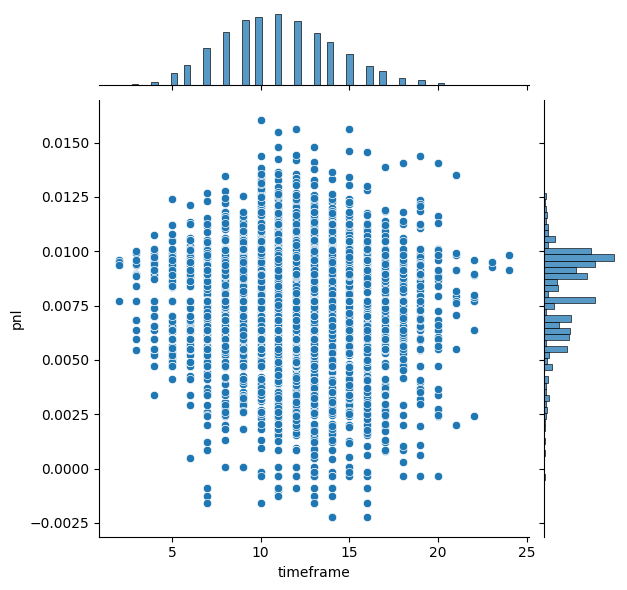

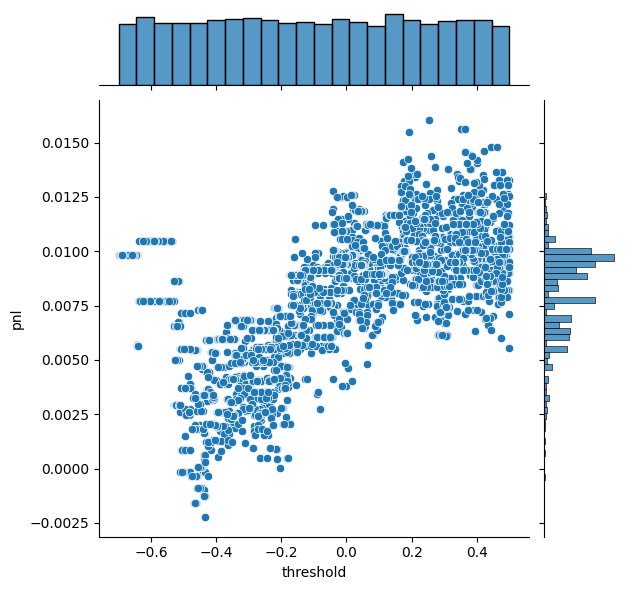

In [426]:
import seaborn as sns

sns.jointplot(
    data=btk.data.query("pnl > -.5"),
    x='stop_loss',
    y='pnl'
)

sns.jointplot(
    data=btk.data.query("pnl > -.5"),
    x='target_profit',
    y='pnl'
)

sns.jointplot(
    data=btk.data.query("pnl > -.5"),
    x='timeframe',
    y='pnl'
)

sns.jointplot(
    data=btk.data.query("pnl > -.5"),
    x='threshold',
    y='pnl'
)

In [428]:
import xarray as xr

btk.trace.posterior["y_model"] = (
    btk.trace.posterior["Intercept"] + 
    btk.trace.posterior["stop_loss"] * xr.DataArray(btk.data.stop_loss) +
    btk.trace.posterior["target_profit"] * xr.DataArray(btk.data.target_profit) +
    btk.trace.posterior["timeframe"] * xr.DataArray(btk.data.timeframe) + 
    btk.trace.posterior["threshold"] * xr.DataArray(btk.data.threshold)
)

/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/arviz/plots/lmplot.py:211: UserWarning:

posterior_predictive not found in idata



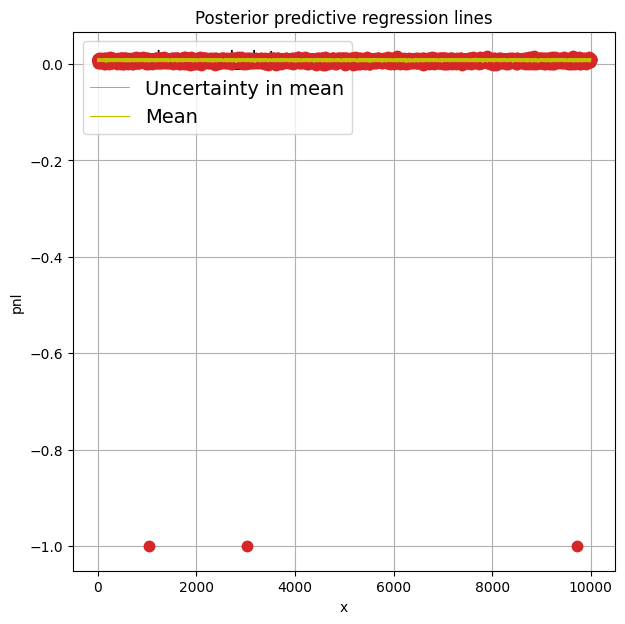

In [429]:
import matplotlib.pyplot as plt
import arviz as az
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=btk.trace, y="pnl", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

In [430]:
btk.data.pnl.describe(percentiles=np.arange(.1,1,.1))

count    10000.000000
mean         0.007767
std          0.017602
min         -1.000000
10%          0.005364
20%          0.006365
30%          0.007000
40%          0.007720
50%          0.008869
60%          0.009122
70%          0.009500
80%          0.009819
90%          0.010122
max          0.016037
Name: pnl, dtype: float64

KeyboardInterrupt: 

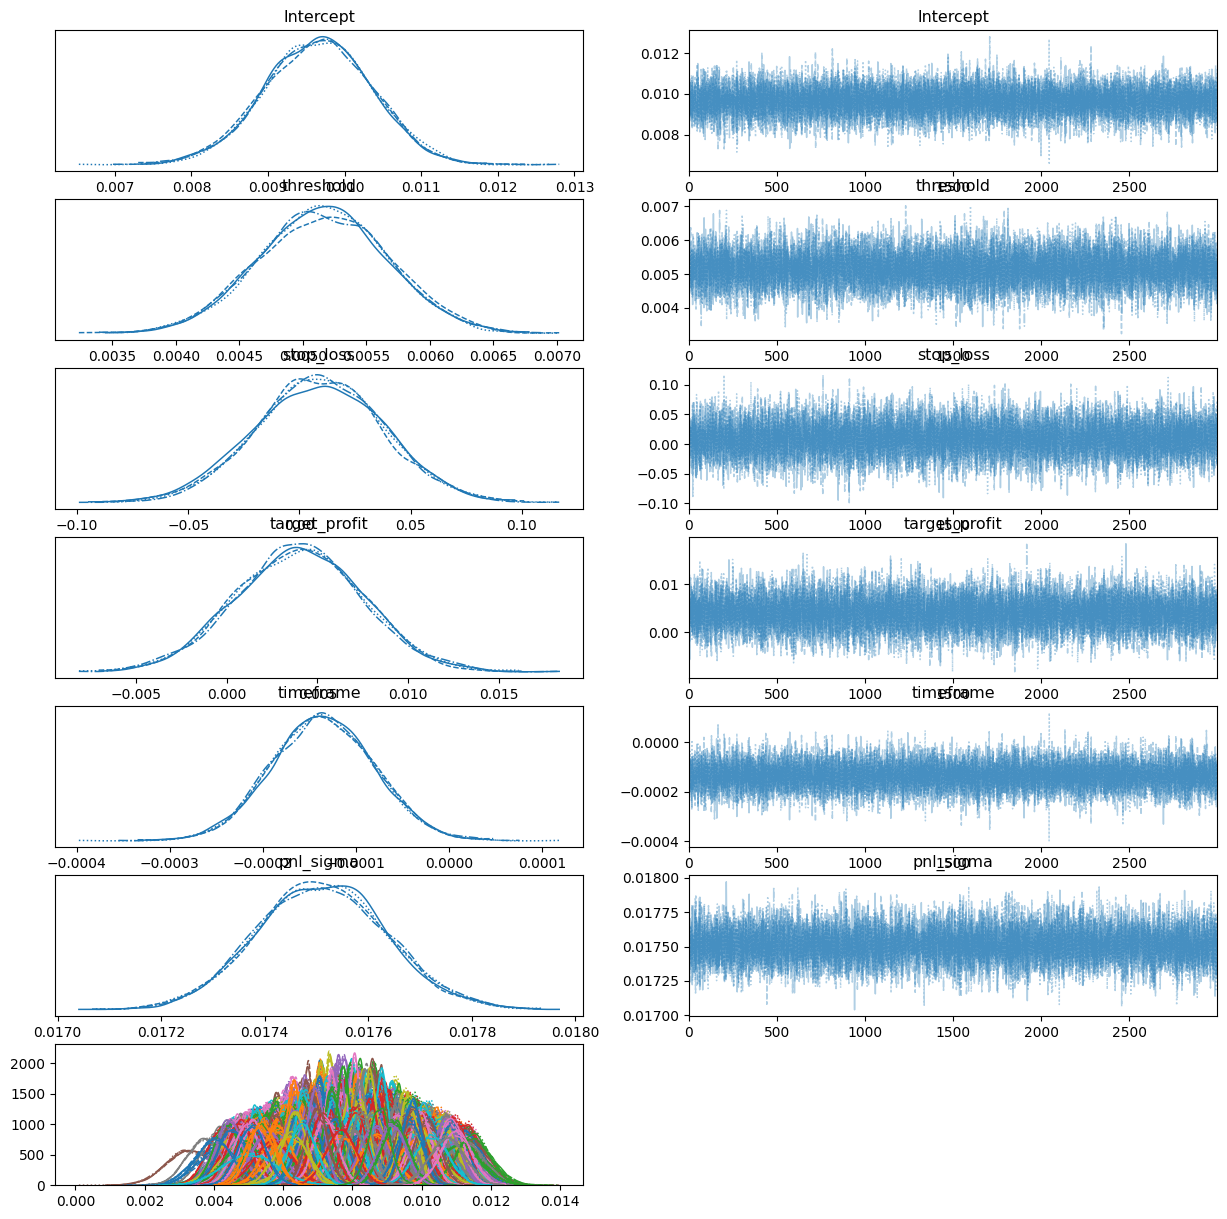

In [432]:
import arviz as az
az.plot_trace(btk.trace, figsize=(15, 15))

<Axes: >

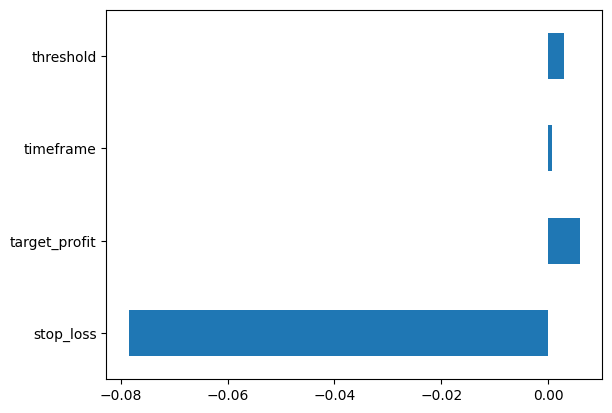

In [438]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False).fit(X=btk.data.query(pnl_query).drop('pnl', axis=1), y=btk.data.query(pnl_query).pnl)

pd.Series(lr.coef_, index=lr.feature_names_in_).plot(kind='barh')

In [435]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(btk.data.pnl, lr.predict(btk.data.drop('pnl', axis=1)))

0.002641520785684888

In [355]:
pd.concat([
    pd.Series(btk.samples.prior.stop_loss.to_numpy()[0], name='stop_loss'),
    pd.Series(btk.samples.prior.target_profit.to_numpy()[0], name='tp'),
    pd.Series(btk.obs, name='outcome')
], axis=1)

,stop_loss,tp,outcome
0,0.005071,0.087786,0.006771
1,-0.005755,0.007812,0.005014
2,0.000399,0.050867,0.001260
3,0.011883,0.028371,0.009158
4,-0.009108,-0.043007,0.006771
...,...,...,...
995,0.004584,0.100093,0.006771
996,0.000646,0.117614,0.006771
997,0.000697,0.055019,0.005014
998,-0.011729,0.103949,0.006771


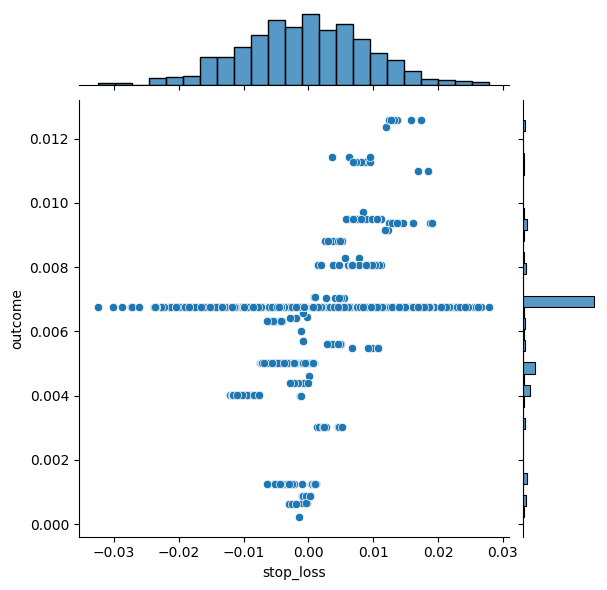

In [356]:
sns.jointplot(
    x=pd.Series(btk.samples.prior.stop_loss.to_numpy()[0], name='stop_loss'),
    y=pd.Series(btk.obs, name='outcome')
)

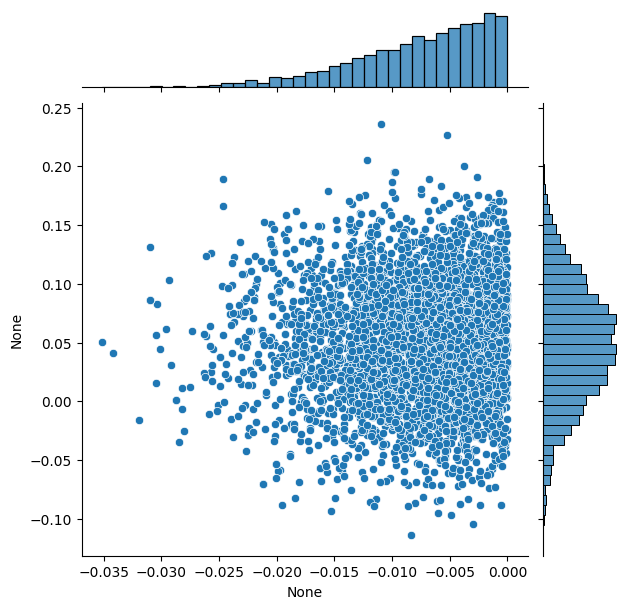

In [277]:
import seaborn as sns

sns.jointplot(
    x=btk.trace.posterior['stop_loss'].to_numpy().flatten(),
    y=btk.trace.posterior['target_profit'].to_numpy().flatten(),
)


<Axes: xlabel='datetime'>

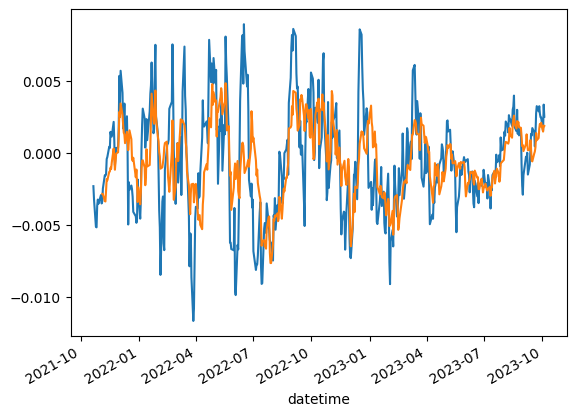

In [177]:
(p1_max_diffs / ohlc.close).iloc[-500:].rolling(10).mean().plot()
(p1_max_diffs / ohlc.close).iloc[-500:].rolling(20).mean().plot()
# (p1_max_diffs / ohlc.close).iloc[-500:].rolling(50).mean().plot()
# ((ohlc.close.shift(1) / ohlc.close) -1).iloc[-500:].rolling(10).mean().plot()



<Axes: xlabel='datetime'>

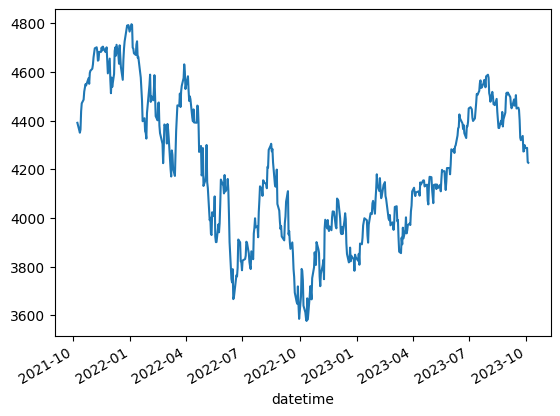

In [167]:
ohlc.close.iloc[-500:].plot()

In [149]:
p1_max_diffs

datetime
1970-12-31 06:00:00   NaN
1971-01-04 06:00:00   NaN
1971-01-05 06:00:00   NaN
1971-01-06 06:00:00   NaN
1971-01-07 06:00:00   NaN
                       ..
2023-09-28 05:00:00   NaN
2023-09-29 05:00:00   NaN
2023-10-02 05:00:00   NaN
2023-10-03 05:00:00   NaN
2023-10-04 04:00:00   NaN
Length: 13306, dtype: float64

<Axes: xlabel='datetime'>

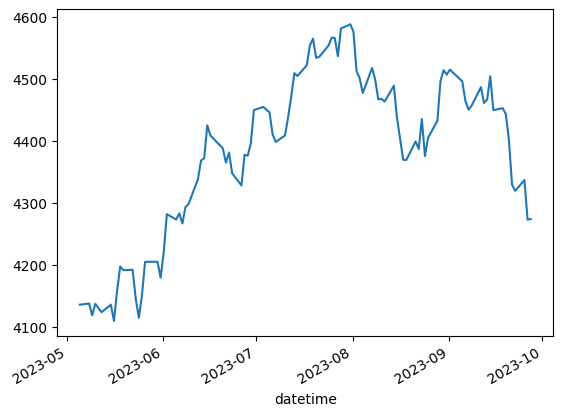

In [28]:
from  sklearn.model_selection import cross_val_predict, TimeSeriesSplit, cross_val_score
pipeline = Pipeline([
    ('basis_expansion', SplineTransformer()),
    ('linear_regression', LinearRegression(fit_intercept=False)),
])
X, y = ohlc[['close']].iloc[-1005:-5], ohlc.close.shift(-5).iloc[-1005:-5]
test_size = 10
gap = 5
n_splits = X.shape[0] // (test_size + gap)
cv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size, gap=gap)

print(np.mean(cross_val_score(pipeline, X=X, y=y, cv=cv, scoring='neg_mean_absolute_error')))

cv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size, gap=gap)

pd.Series(cross_val_predict(pipeline, X, y, cv=cv, method='predict'), index=X.index).iloc[-100:].plot()
y.iloc[-100:].plot()

-84.85186478033258


ValueError: cross_val_predict only works for partitions

In [201]:
ohlc['f5_high'] = (ohlc.close.shift(-60).rolling(60).max() / ohlc.close) - 1
ohlc['f5_low'] = (ohlc.close.shift(-60).rolling(60).min() / ohlc.close) - 1


In [72]:
from itertools import product
import numpy as np
import pandas as pd

def unroll_period(daily_df, p, cols):
    
    def get_col_dict():
        col_dict = {}
        for i in np.arange(p):
            col_dict[i] = [f'{x[0]}_{x[1]}' for x in product(cols, [i])]
        return col_dict
    
    col_dict = get_col_dict()

    def flatten(df, idx):
        cols = []
        for i in np.arange(df.shape[0])+1:
            cols.extend(col_dict[i])
        try:
            return pd.Series(df.flatten(), index=cols, name=idx)
        except Exception as e:
            print(e)
            print(df.values.flatten().shape, cols)
            return pd.Series(df.flatten(), name=idx)

    df = daily_df[cols].sort_index(ascending=False)
    flat_df = []
    for i in np.arange(0, df.shape[0]-p, 1):
        try:
            flat_df.append(
                flatten(df.values[i+1:i+p], idx=df.index[i])
            )
        except:
            print(i+p, i)
    flat_df = pd.concat(flat_df, axis=1).T.sort_index()

    return flat_df

In [202]:
def choppiness_index(df, atr_length=1, ci_length=21):
    df[f'atr_{atr_length}'] = pta.atr(df.high, df.low, df.close, length=atr_length)
    df[f'high_{ci_length}'] = df.high.rolling(ci_length).max()
    df[f'low_{ci_length}'] = df.low.rolling(ci_length).min()
    df[f'ci_{ci_length}'] = 100 * np.log10((df[f'atr_{atr_length}'].rolling(ci_length).sum()) / (df[f'high_{ci_length}'] - df[f'low_{ci_length}'])) / np.log10(ci_length)
    return df

In [203]:
ohlc = choppiness_index(ohlc)

In [239]:
from lightgbm import LGBMClassifier

X = pd.concat([
    unroll_period(((ohlc['HMA_21'] / ohlc.open) - 1).rename('hma_21_open').to_frame(), p=20, cols=['hma_21_open']),
    unroll_period(((ohlc['HMA_14'] / ohlc.open) - 1).rename('hma_14_open').to_frame(), p=20, cols=['hma_14_open']),
    unroll_period(((ohlc['SUPERT_21_1.6'] / ohlc.open) - 1).rename('st_open').to_frame(), p=20, cols=['st_open']),
    unroll_period((((ohlc.HMA_21 > ohlc['SUPERT_21_1.6'])) - 1).rename('hma_to_st').to_frame(), p=20, cols=['hma_to_st']),
    (ohlc.HMA_21 > ohlc['SUPERT_21_1.6']).rolling(30).mean().rename('hma_to_st 30p'),
    unroll_period(ohlc, p=20, cols=['RSI_14','RSI_21']),
    unroll_period(ohlc[['ci_21']], p=20, cols=['ci_21']).divide(ohlc.ci_21, axis=0),
    unroll_period(ohlc, p=20, cols=['open','high','low','close']).divide(ohlc.open, axis=0),
    unroll_period(ohlc, p=10, cols=['f5_high','f5_low']).shift(60),
], axis=1).dropna(how='any', axis=0)
ybuy = (ohlc['f5_high'] > 0.003).dropna(how='any', axis=0)
ysell = (ohlc['f5_low'] < -0.03).dropna(how='any', axis=0)
idx = X.index.intersection(ybuy.index)
X = X.loc[idx]
ysell = ysell.loc[idx]
ybuy = ybuy.loc[idx]

In [205]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict

print(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ybuy, scoring='recall_weighted'))
print(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ybuy, scoring='average_precision'))
print(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ybuy, scoring='f1_micro'))
print(np.mean(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ybuy, scoring='f1_micro')))

print(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ysell, scoring='recall_weighted'))
print(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ysell, scoring='average_precision'))
print(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ysell, scoring='f1_micro'))
print(np.mean(cross_val_score(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ysell, scoring='f1_micro')))

[1. 1. 1. 1. 1.]


/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:839: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/utils/_response.py", line 181, in _get_response_values
    prediction_method = _check_response_method(estimator, response_method)
  File "/home/oem

[nan nan nan nan nan]
[1. 1. 1. 1. 1.]
1.0
[1. 1. 1. 1. 1.]


/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:839: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/sklearn/utils/_response.py", line 181, in _get_response_values
    prediction_method = _check_response_method(estimator, response_method)
  File "/home/oem

[nan nan nan nan nan]
[1. 1. 1. 1. 1.]
1.0


In [240]:
from lightgbm import LGBMClassifier, LGBMRegressor
idx = X.index.intersection(ohlc.f5_high.dropna().index)
f5h_preds = pd.Series(cross_val_predict(LGBMRegressor(max_depth=3, verbose=-1), X=X.loc[idx], y=ohlc.f5_high.loc[idx], method='predict'), index=idx)
f5l_preds = pd.Series(cross_val_predict(LGBMRegressor(max_depth=3, verbose=-1), X=X.loc[idx], y=ohlc.f5_low.loc[idx], method='predict'), index=idx)

In [241]:
i = 1000

data = [

                # go.Line(x=f5h_preds.index[-i:],
                #         y=f5h_preds.iloc[-i:],
                #         name='f5hp'
                # ),

                # go.Line(x=ohlc.loc[idx].index[-i:],
                #         y=ohlc.loc[idx].f5_high.iloc[-i:],
                #         name='f5h'
                # ),

                go.Line(x=f5l_preds.index[-i:],
                        y=f5l_preds.iloc[-i:],
                        name='f5lp'
                ),
                go.Line(x=ohlc.loc[idx].index[-i:],
                        y=ohlc.loc[idx].f5_low.iloc[-i:],
                        name='f5l'
                ),
]

fig = go.Figure(data=data)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

/home/oem/.cache/pypoetry/virtualenvs/stock-experiments-Cth4nXLD-py3.10/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [174]:

print(ysell.mean())

buy_preds = pd.Series(cross_val_predict(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ybuy, method='predict_proba')[:,1], index=ybuy.index)
sell_preds = pd.Series(cross_val_predict(LGBMClassifier(max_depth=3, verbose=-1), X=X, y=ysell, method='predict_proba')[:,1], index=ybuy.index)

0.15458422174840086


In [176]:
ohlc['f5_high'].loc[ybuy.index].groupby(buy_preds > .4).describe()

,count,mean,std,min,25%,50%,75%,max
False,816.0,0.012940,0.017416,-0.039996,0.002298,0.010971,0.021400,0.121017
True,117.0,0.022574,0.031989,-0.067071,0.006988,0.020170,0.038111,0.175503


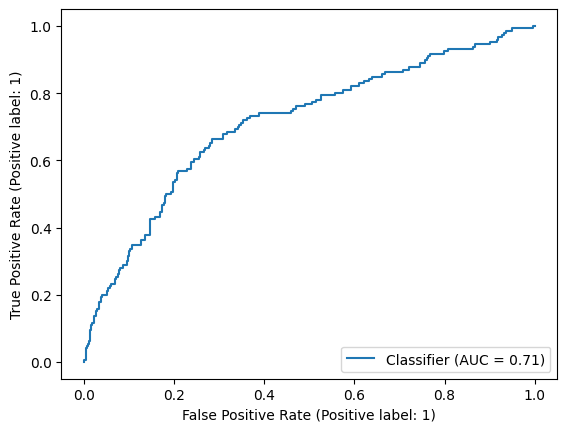

In [177]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ybuy, buy_preds, )

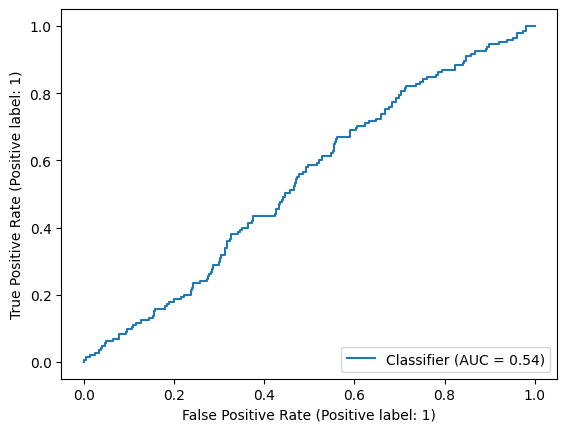

In [178]:
RocCurveDisplay.from_predictions(ysell, sell_preds)

In [179]:
ohlc['buy'] = 0
ohlc['buy'].loc[buy_preds.index] = ((buy_preds > .5) & (buy_preds > sell_preds)).astype(int)
ohlc['sell'] = 0
ohlc['sell'].loc[buy_preds.index] = ((sell_preds > .5) & (sell_preds > buy_preds)).astype(int)
ohlc['sell_marker'] = ohlc.close * ohlc.sell.replace({0:np.nan})
ohlc['buy_marker'] = ohlc.close * ohlc.buy.replace({0:np.nan})


/tmp/ipykernel_892743/747542825.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_892743/747542825.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
ohlc['buy'] = ((ohlc.f5_high > .05) & (ohlc.f5_high > ohlc.f5_low.abs())).astype(int)
ohlc['sell'] = ((ohlc.f5_low.abs() > .05) & (ohlc.f5_low.abs() > ohlc.f5_high.abs())).astype(int)
ohlc['buy'] = ((ohlc.HMA_21 > ohlc['SUPERT_21_1.6']).shift(1) | ((ohlc.open > ohlc.HMA_21) | (ohlc.close > ohlc.HMA_21))).astype(float)
ohlc['sell'] = ((ohlc.HMA_21 < ohlc['SUPERT_21_1.6']).shift(1) | ((ohlc.open < ohlc.HMA_21) | (ohlc.close < ohlc.HMA_21))).astype(float)

ohlc['buy'] = ((ohlc.HMA_21 > ohlc['SUPERT_21_1.6']).shift(1) & ((ohlc.HMA_21 > ohlc.HMA_21.shift(1)))).astype(float)
ohlc['sell'] = ((ohlc.HMA_21 < ohlc['SUPERT_21_1.6']).shift(1) & ((ohlc.HMA_21 < ohlc.HMA_21.shift(1)))).astype(float)
ohlc['sell_marker'] = ohlc.close * ohlc.sell.replace({0:np.nan})
ohlc['buy_marker'] = ohlc.close * ohlc.buy.replace({0:np.nan})


In [217]:
ohlc.groupby('buy').f5_high.describe(percentiles=np.arange(.1,1,.1))

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
buy,,,,,,,,,,,,,,
0.0,8116.0,0.001701,0.001706,-0.005736,0.000042,0.000335,0.000614,0.000879,0.001233,0.001648,0.002180,0.002815,0.003991,0.010919
1.0,5003.0,0.001606,0.001706,-0.006042,0.000035,0.000279,0.000526,0.000787,0.001101,0.001531,0.002013,0.002657,0.003744,0.010191


In [218]:
ohlc.groupby('sell').f5_low.describe(percentiles=np.arange(.1,1,.1))

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
sell,,,,,,,,,,,,,,
0.0,8147.0,-0.001787,0.001909,-0.013306,-0.004122,-0.002984,-0.002217,-0.001685,-0.00127,-0.000907,-0.000599,-0.000313,-0.000019,0.004444
1.0,4972.0,-0.001742,0.001831,-0.011883,-0.003895,-0.002915,-0.002189,-0.001703,-0.00129,-0.000919,-0.000591,-0.000294,-0.000025,0.002952


<Axes: xlabel='datetime'>

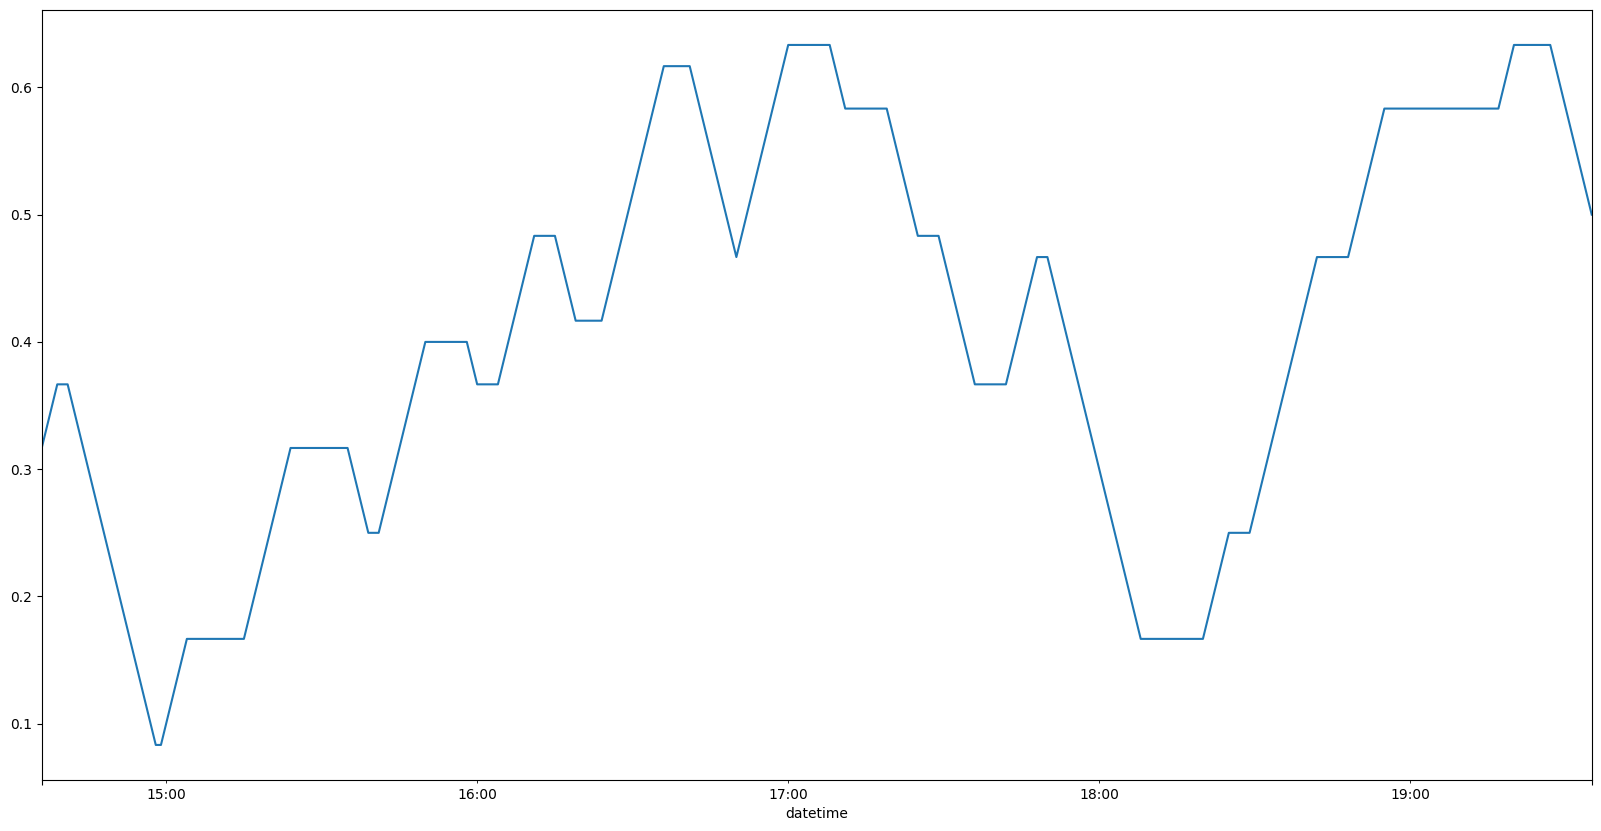

In [230]:
(ohlc.HMA_21 > ohlc['SUPERT_21_1.6']).rolling(60).mean().iloc[-400:-100].plot(figsize=(20,10))


<Axes: xlabel='datetime'>

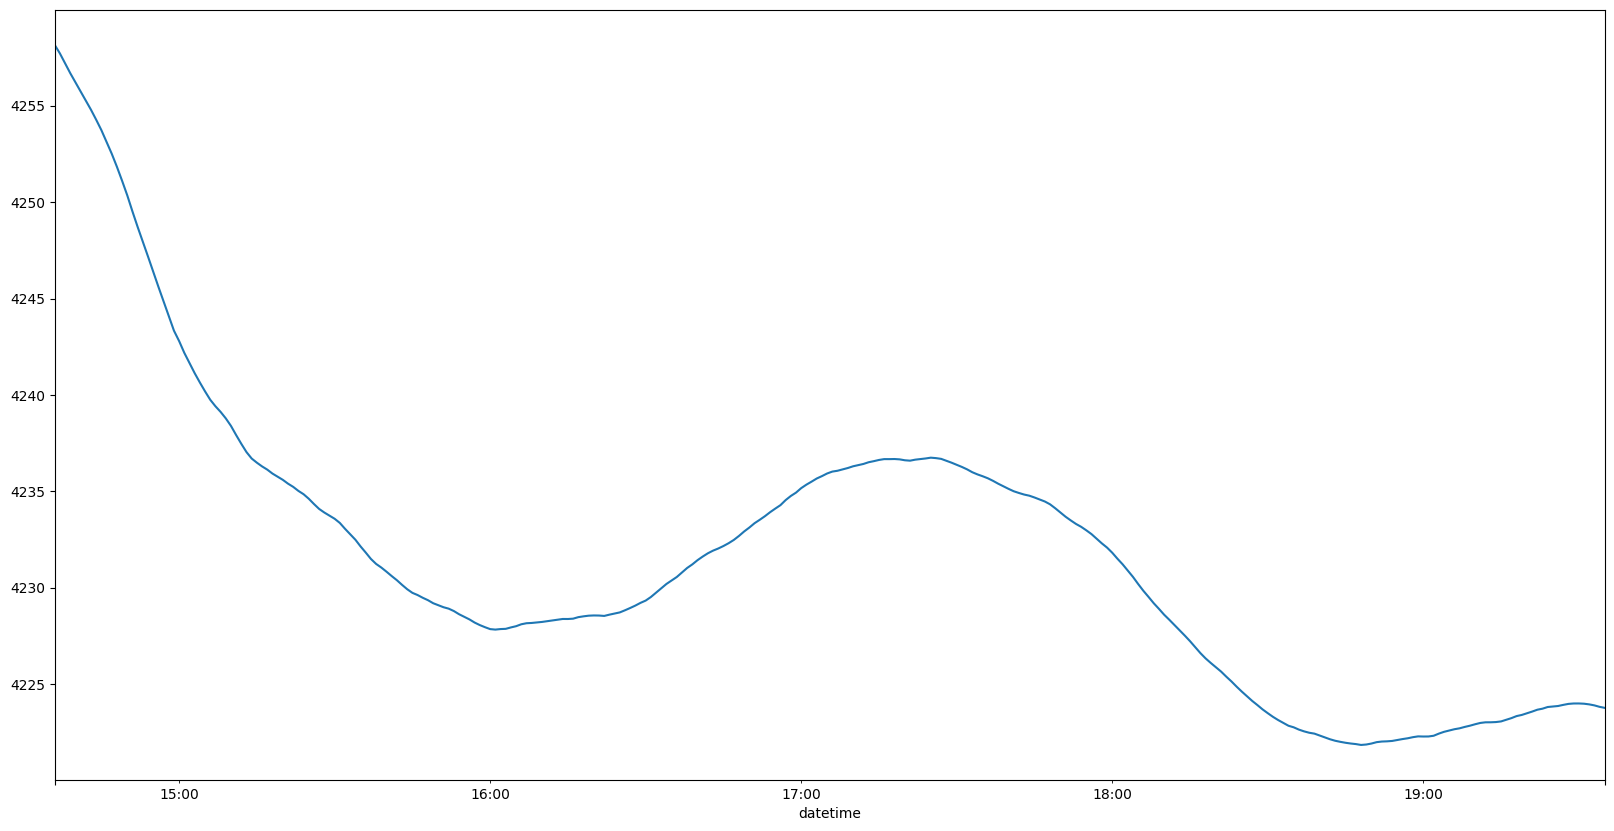

In [227]:
ohlc.close.rolling(60).mean().iloc[-400:-100].plot(figsize=(20,10))

In [252]:
i = 400
j = 100

df = ohlc.loc[ohlc.date == dt.date(year=2023, month=8, day=24)]

data = [
        go.Ohlc(x=df.index,
                    open=df.open,
                    high=df.high,
                    low=df.low,
                    close=df.close,
                ),
                go.Line(x=df.index,
                        y=df.HMA_21,
                        name='HMA'
                ),
                go.Line(x=df.index,
                        y=df['SUPERT_21_1.6'],
                        name='ST'
                ),
    go.Scatter(x=df.index,
                   y=df.buy_marker,
                   mode='markers',
                   name ='markers',
                   marker=go.Marker(size=5,
                                    color='green')
                   ),

    go.Scatter(x=df.index,
                   y=df.sell_marker,
                   mode='markers',
                   name ='markers',
                   marker=go.Marker(size=5,
                                    color='red')
                   )
]

fig = go.Figure(data=data)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [244]:
ohlc.groupby(ohlc.date).apply(lambda x: (x.HMA_21 > x['SUPERT_21_1.6']).rolling(30).mean().describe().drop('count'))

,mean,std,min,25%,50%,75%,max
date,,,,,,,
2023-08-18,0.496084,0.216480,0.000000,0.366667,0.533333,0.666667,1.000000
2023-08-21,0.593734,0.185533,0.133333,0.466667,0.600000,0.733333,1.000000
2023-08-22,0.454917,0.186026,0.000000,0.366667,0.466667,0.566667,0.866667
2023-08-23,0.653003,0.180028,0.166667,0.566667,0.666667,0.766667,1.000000
2023-08-24,0.391645,0.222811,0.000000,0.233333,0.400000,0.566667,0.833333
2023-08-25,0.509225,0.275078,0.000000,0.333333,0.500000,0.666667,1.000000
2023-08-28,0.589034,0.212211,0.000000,0.433333,0.600000,0.733333,1.000000
2023-08-29,0.634465,0.177063,0.266667,0.533333,0.633333,0.750000,1.000000
2023-08-30,0.523238,0.183661,0.166667,0.366667,0.533333,0.666667,1.000000
